In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


*Univariate Analysis*

In [5]:
import warnings
warnings.filterwarnings('ignore')

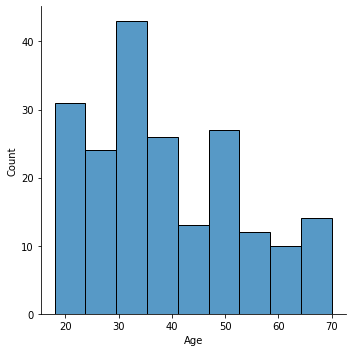

In [6]:
sns.displot(data.Age)

*Bivariate Analysis*

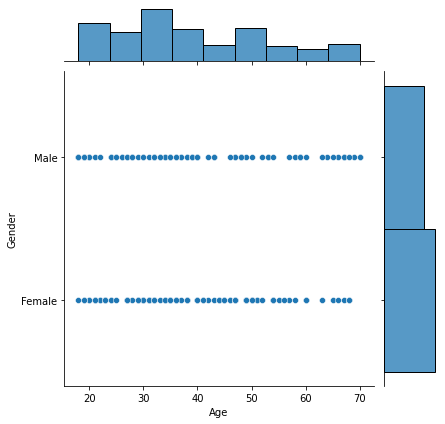

In [7]:
sns.jointplot(x=data.Age,y=data.Gender)

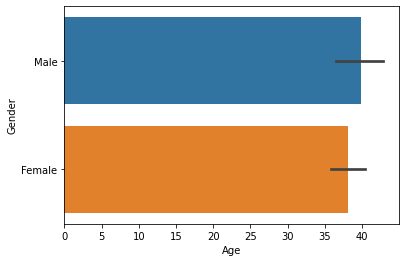

In [8]:
sns.barplot(x=data.Age,y=data.Gender)

*Perform the descriptive statistics on the dataset*

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [12]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [13]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [14]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [15]:
data.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

*Check the missing values and deal with them*

In [16]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [17]:
data.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


*Find the outliers and replace them outliers*

In [18]:
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)
IQR=q3-q1
upper_limit= q3+1.5*IQR
lower_limit= q1-1.5*IQR
data=data[data.Age<upper_limit]

In [19]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [20]:
data.shape

(200, 5)

*Check the categorical columns and perform encoding*

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
data["Age"]=le.fit_transform(data['Age'])
data["Gender"]=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,15,39
1,2,1,3,15,81
2,3,0,2,16,6
3,4,0,5,16,77
4,5,0,13,17,40


*Split the data into dependent and independent variables*

In [24]:
Y = data.iloc[:, -1]
print(Y)
X = data.iloc[:, :-1]
print(X)

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64
     CustomerID  Gender  Age  Annual Income (k$)
0             1       1    1                  15
1             2       1    3                  15
2             3       0    2                  16
3             4       0    5                  16
4             5       0   13                  17
..          ...     ...  ...                 ...
195         196       0   17                 120
196         197       0   27                 126
197         198       1   14                 126
198         199       1   14                 137
199         200       1   12                 137

[200 rows x 4 columns]


*Scaling the data*

In [25]:
from sklearn.preprocessing import scale
X = pd.DataFrame(X)
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.446834,-1.738999
1,-1.706091,1.128152,-1.299798,-1.738999
2,-1.688771,-0.886405,-1.373316,-1.700830
3,-1.671450,-0.886405,-1.152762,-1.700830
4,-1.654129,-0.886405,-0.564618,-1.662660


*Split the data into training and testing*

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
X = np.arange(1,25).reshape(12,2)
Y = np.array([0,1,1,0,1,0,0,1,1,0,1,0])
X,Y

(array([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
        [17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]), array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0]))

In [28]:
x=data.drop(columns=["Gender"],axis=1)
x.head()
y = data["Gender"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

In [29]:
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.446834,-1.738999,-0.434801
1,-1.706091,-1.299798,-1.738999,1.195704
2,-1.688771,-1.373316,-1.700830,-1.715913
3,-1.671450,-1.152762,-1.700830,1.040418
4,-1.654129,-0.564618,-1.662660,-0.395980


In [30]:
X_train,X_test,Y_train,y_test = train_test_split(X,Y)
X_train

array([[ 3,  4],
       [ 7,  8],
       [19, 20],
       [13, 14],
       [17, 18],
       [21, 22],
       [ 9, 10],
       [ 5,  6],
       [23, 24]])

In [31]:
X_test

array([[ 1,  2],
       [15, 16],
       [11, 12]])

In [32]:
Y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0])

In [33]:
y_test

array([0, 1, 0])

In [35]:
X_train,X_test, Y_train,Y_test =train_test_split(X_Scaled,y,test_size=0.9, random_state=9,stratify=y)
X_train

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
112,0.216509,-0.049992,0.131303,-0.318337
174,1.290394,0.979259,1.047369,-1.444162
44,-0.961300,0.758705,-0.822933,-0.861839
68,-0.545603,-1.446834,-0.479408,0.341630
71,-0.493641,0.611669,-0.441239,-0.318337
37,-1.082545,-0.638136,-1.013780,0.885132
138,0.666848,-1.446834,0.512997,-1.560627
27,-1.255753,-0.270546,-1.242797,0.419273
170,1.221111,0.097044,1.009200,-1.444162
128,0.493641,1.493885,0.398489,-1.521805


In [36]:
X_test

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
110,0.181868,1.787957,0.093133,0.069879
93,-0.112585,0.097044,-0.021375,-0.395980
132,0.562924,-1.005726,0.436658,-0.628909
104,0.077943,0.758705,0.054964,0.225165
146,0.805414,0.685187,0.627505,-0.551266
...,...,...,...,...
21,-1.359677,-1.005726,-1.395474,0.885132
23,-1.325035,-0.564618,-1.357305,0.885132
172,1.255753,-0.197028,1.009200,-1.560627
181,1.411639,-0.491100,1.390894,1.389812


In [37]:
Y_train

112    0
174    0
44     0
68     1
71     0
37     0
138    1
27     1
170    1
128    1
15     1
55     1
89     0
5      0
105    0
78     0
72     0
75     1
80     1
16     0
Name: Gender, dtype: int64

In [38]:
Y_test

110    1
93     0
132    0
104    1
146    1
      ..
21     1
23     1
172    1
181    0
62     0
Name: Gender, Length: 180, dtype: int64

In [39]:
X_train.shape

(20, 4)

In [40]:
Y_train.shape

(20,)

In [41]:
X_test.shape

(180, 4)

In [42]:
Y_test.shape

(180,)

*Perform any of the clustering algorithms*

In [45]:
pred=knn.predict(X_test)
pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1])

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=4,criterion='entropy')
model.fit(X_train,Y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

*Train and test the Model*

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_train,y_predict_train))

Training accuracy:  0.75


In [53]:
print('Testing accuracy: ',accuracy_score(Y_test,y_predict))

Testing accuracy:  0.5444444444444444
